# Chem 30324, Spring 2019, Homework 2
## Due: January 30, 2019

## Problem 1. Gases on a table top

In class we derived the properties of a 3-dimensional gas from the Boltzmann distribution and three postulates, and you studied a 1-dimensional gas in Homework 1. Suppose you were interested instead in a 2-dimensional gas, for example gas molecules able to freely skate around on a surface but that couldn’t escape the surface.

### 1. Derive the Maxwell-Boltzman speed distribution for a 2-dimensional gas. (*Hint*: Think polar coordinates.)

In [274]:
from sympy import *  # Use sympy module for symbolic calculation. 
m=Symbol('m')  # Define symbols for calculation. 
k=Symbol('k')
T=Symbol('T')
v=Symbol('v')
o=Symbol('o')
P=integrate(sqrt(m/(2*pi*k*T))*exp(-m*v**2/(2*k*T))*v,(o,0,2*pi))  # o serve as theta here, representing the angle of velocity. 
NP=integrate(sqrt(2*pi*m/(k*T))*v*exp(-m*v**2/(2*T*k)),(v,0,+oo),conds='none')
print("Maxwell-Boltzman distribution: ",P)
print("Coefficient for nomalizing: ",NP)

Maxwell-Boltzman distribution:  sqrt(2)*sqrt(pi)*v*sqrt(m/(T*k))*exp(-m*v**2/(2*T*k))
Coefficient for nomalizing:  sqrt(2)*sqrt(pi)*T*k*sqrt(m/(T*k))/m


For 2-dimensional gas, Maxwell-Boltzman speed distribution:

$p(v)=\sqrt{\frac{2\pi m}{kT}}ve^{\frac{-mv^2}{2kT}}$

$\int_{0}^{\infty} p(v)dv=\sqrt{\frac{2\pi kT}{m}}$

$\therefore \widetilde{P}(x)=\frac{mv}{kT}e^{\frac{-mv^2}{2kT}}$

### 2. Plot this 2-dimensional speed distribution for O$_2$ molecules at 200, 400 and 600 K.

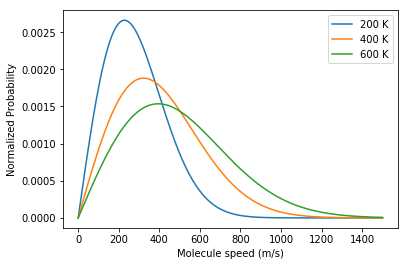

In [275]:
import matplotlib.pyplot as plt
import numpy as np
v=np.linspace(0,1500,1000) 
p=[]
T=[200,400,600]
k=1.38064852*10**(-23)
m=32/(6.02*10**26)
def MBp(v):  # It is required to build a 'callable function' for latter integrate calculation. 
    return m*v/(k*t)*exp(-m*v**2/(2*k*t))
for j in range(3):
    t=T[j]  # Setting value for temperature in every loop. 
    for i in range(1000):
        p.append(MBp(v[i]))  # Append data to the list for plotting use. 
        i+=1
    plt.plot(v,p,label='%i K'%t)  # Plot the data stored in the list. 
    p.clear()  # Clear the list for next loop. 
    plt.legend()  # Show the label of each line. 
    plt.xlabel('Molecule speed (m/s)')
    plt.ylabel('Normalized Probability')
# If you don't put the plot relative codes in the 'for' loop, it will return some strange text telling you where the data is stored. So it's recommended to code as shown. 

### 3. Calculate the mean (expected value) of the speed of a 2-dimensional gas of molecules. How does your answer compare to a 3-dimensional gas?

In [276]:
m=Symbol('m',positive=True)
k=Symbol('k',positive=True)
T=Symbol('T',positive=True)
v=Symbol('v')
expv=integrate(v*m*v/(k*T)*exp(-m*v**2/(2*k*T)),(v,0,+oo))
print('Mean of the speed of a 2-dimentional gas of molecules:')
pprint(expv)  # If you want to print out the results from sympy more graphically, use function 'pprint' rather than 'print'.

Mean of the speed of a 2-dimentional gas of molecules:
√2⋅√π⋅√T⋅√k
───────────
    2⋅√m   


Mean of the speed of a 3-dimentional gas of molecules: 
$\sqrt{\frac{8kT}{\pi m}}$

Comparing:
$\sqrt{\frac{\pi kT}{2m}}$

They are both proportional to $\sqrt{\frac{kT}{m}}$

### 4. Calculate the mean kinetic energy of a 2-dimensional gas. How does your answer compare to a one and 3-dimensional gas?

In [279]:
expk=integrate(0.5*v*v*m*v/(k*T)*exp(-m*v**2/(2*k*T)),(v,0,+oo))
print('Mean kinetic energy of a 2-dimensional gas:')
pprint(expk)

Mean kinetic energy of a 2-dimensional gas:
1.0⋅T⋅k
───────
   m   


Mean kinetic energy of a 1-dimensional gas:
$\frac{0.5kT}{m}$

Mean kinetic energy of a 2-dimensional gas:
$\frac{1.0kT}{m}$

Mean kinetic energy of a 3-dimensional gas:
$\frac{1.5kT}{m}$

Each degree of freedom contains kinetic energy of $\frac{0.5kT}{m}$.

## Problem 2. (Kinetics and Transport)

In junior Chemical Engineering laboratory, you will study the diffusion and solubility of CO$_2$ in an organic solvent using a diffusion cell like the one sketched here. <img src="imgs/HW2_P2.png">Let’s suppose that the gas space at the top of the diffusion cell is approximately 2 cm high and 4 cm in diameter. Further suppose that the gas in the head of the cell is pure CO$_2$ at 298 K and 1 bar pressure. Note that CO$_2$ has a collision diameter d of 0.40 nm.

### 5. What does gas kinetic theory predict for the gas self-diffusion constant $D_{11}$ of CO$_2$ gas in the cell, in cm$^2$s$^{−1}$?

In [2]:
import numpy as np
T  = 298 # temperature in K 
p  = 1e5 # pressure in Pa
d  = 4e-10 # collision diameter in m
m  = 0.044/6.02e23 # mass in kg/molecule
kb = 1.38e-23 # boltzmann constant in J/K

a     = np.pi*d**2 #collision cross section area in m^2
v     = (8*kb*T/(np.pi*m))**0.5  #average velocity in m/s
lambd = kb*T/p/(2**0.5*a) # mean free path in m
D11   = 1/3*lambd*v*10000 # self-diffusion constant in cm^2/s
print('Self-diffusion constant of CO2 is %f cm^2/s.'%(D11))

Self-diffusion constant of CO2 is 0.072993 cm^2/s.


### 6. Use the Stokes-Einstein relationship to estimate the diffusion constant of CO$_2$ in the Stoddard solvent.  How does this compare with the diffusion constant in the gas phase? Why?

In [3]:
r = d/2 # m
visc = 1e-3 # Pa*s (between 0.74e-3 to 1.65e-3 Pa*s according to Wikipedia)
D12 = kb*T/(4*np.pi*visc*r)*10000 # cm^2/s, slip boundary Stoke-Einstein equation is chosen because it's a interaction between a molecule and another molecule
print('D_CO2_Stoddardsolvent is %f cm^2/s.'%(D12))
print('The diffusion coefficient is smaller in Stoddard solvent due to greater viscosity.')

D_CO2_Stoddardsolvent is 0.000016 cm^2/s.
The diffusion coefficient is smaller in Stoddard solvent due to greater viscosity.


### 7. We found in class that the probability for a molecule to diffuse a distance $x$ in time $t$ is Gaussian with mean 0 and standard deviation $\sigma = \sqrt{2D_{11}t}$. About how long will it take for 1/3 of the molecules starting at the center of the gas space to diffuse all the way to the surface of the liquid, i.e., > 1 cm?

In [4]:
from scipy.stats import norm

#Through searching in the web, you'll find a scipy function : ppf 
#stands for percent point function). Why? Because we're interested in 
#the 66.7 percentile of a normal distribution function (mu=0, sigma=1).
prob = norm.ppf(2/3); print("P(>2/3)\t= %f"%prob)  

#The first thing you should ask is: what is the value of sigma? 
#If sigma = 1, the 66.7 percentile lies at x = 0.43cm
#But since we know that x = 1cm here, sigma must be greater than 1
sigma = 1/prob; print("sigma\t= %f cm"%sigma)

#Solve for time using the equation given
t = sigma**2/2/D11;
print("Time needed for 1/3 of gas to diffuse to the surface is %.2f s"%t)

P(>2/3)	= 0.430727
sigma	= 2.321655 cm
Time needed for 1/3 of gas to diffuse to the surface is 36.92 s


### 8. How many collisions on average does one of these diffusing CO$_2$ molecule make with other gas molecules on the way from the middle of the vapor space to the surface of the solvent?

In [5]:
#We know that collision frequency = average speed/mean free path
z = v/lambd; print("z = %E s^-1"%z)

#number of collision = frequency * time travelled
#use travel time from problem 7
n = z*t; print("Collision number = %E"%n)

z = 6.543033E+09 s^-1
Collision number = 2.415825E+11


### 9. How far in total distance does this typical CO$_2$ molecule travel in the time it takes to reach the solvent surface from the middle of the cell?

In [6]:
dist = v*t #distance = velocity * time
print("Total distance = %f m"%dist)

Total distance = 13975.777109 m


### 10. How many CO$_2$ molecules impinge on the surface of the Stoddard solvent in one second?

In [7]:
#use Wall collision frequency equation in notes
jw = 1/4*p/(kb*T)*v   #flux = collision/area/time
area = np.pi*0.02**2  #area in m^2
n = jw*area*1         #flux*area*second = num of collision
print("Wall collision frequency = %E"%n)

Wall collision frequency = 2.891640E+24


### 11. Using your estimate of the diffusion constant in the solvent, how long does it take the same fraction CO$_2$  molecules to diffuse a similar distance in 1-dimension in the liquid phase?

In [8]:
from scipy.stats import norm
t = sigma**2/2/D12;  #calculate t from D12 by using the same as problem 7
print("Time needed for 1/3 of gas to diffuse 1cm in solvent is %.2f s"%t)

Time needed for 1/3 of gas to diffuse 1cm in solvent is 164706.11 s


### 12. Is it safe to assume that any CO$_2$ that travels from the surface into the bulk of the solvent is rapidly replaced from the gas phase?

Comparing problem 7 & 11, we see that diffusion is order-of-magnitude greater in gas phase than in liquid phase. Hence, gas molecule dissolved into solvent will be rapidly replaced by other gas molecules.

### 13. Suppose the volume of the gas-handling manifold is 100 cm$^3$ and is pressurized with CO$_2$ in the morning to 1.1 atm.  What will the pressure in the manifold be four hours later, when lab starts, if the manifold has a pinhole of 1 μm$^2$?

In [9]:
V = 1e-4 #m^3
A = 1e-12 #m^2
p0= 1.1*101325 #Pa

#use effusion from a vessel equation in notes
tau = V/A*(2*np.pi*m/(kb*T))**0.5 #tau in s
p = p0*np.exp(-4*3600/tau)        #effusion from a vessel equation
print("Pressure in the manifold be four hours later = %f Pa"%p)

Pressure in the manifold be four hours later = 109948.998355 Pa
